In [ ]:
#1. Gathering and Reading Data using Feather

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install pyarrow

In [5]:
all_data = pd.read_feather(r"C:\Users\addak\0. Udemy\UCourse_Real-World Data Projects 1\E-Commerce_Sales-Data-Analysis/Sales_data.ftr")

In [7]:
all_data.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [ ]:
'''

Observation: The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost ,
purchase address, etc

'''

In [ ]:
#Next, Data Cleaning Process

In [9]:
all_data.isnull().sum() ## checking out total missing values we have 

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [11]:
###There are 545 instances of rows with missing values. These should be removed
all_data = all_data.dropna(how="all")

In [13]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [15]:
### Checking for Duplicates
all_data.duplicated()

0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186305, dtype: bool

In [17]:
all_data[all_data.duplicated()] ## total 618 duplicate rows ..

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [19]:
all_data = all_data.drop_duplicates() ## Dropping all the duplicate rows ..

In [21]:
all_data.shape

(185687, 6)

In [23]:
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
#Which is the best month for sale
### Best: if any month has maximum sales,  will be considered that as best

In [25]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [27]:
#Adding Month Columns
all_data['Order Date'][0]

'04/19/19 08:46'

In [29]:
'04/19/19 08:46'.split(' ')[0]

'04/19/19'

In [31]:
'04/19/19 08:46'.split(' ')[0].split('/')[0] ## extracting month from "Order Date"

'04'

In [33]:
all_data['Order Date'][0].split('/')[0] ## extracting month from "Order Date"

'04'

In [35]:
def return_month(x):
    return x.split('/')[0]

In [37]:
all_data['Month'] = all_data['Order Date'].apply(return_month) ## applying return_month function on top of "Order Date" feature

In [39]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [43]:
print(all_data['Month'].unique())  # Check the unique values in the 'Month' column

['04' '05' 'Order Date' '08' '09' '12' '01' '02' '03' '07' '06' '11' '10']


In [45]:
# Remove rows where 'Month' contains invalid values (e.g., non-numeric entries)
all_data = all_data[all_data['Month'].str.isnumeric()]  # Keeps only numeric month values

In [47]:
all_data['Month'] = all_data['Month'].astype(int)

In [49]:
all_data['Month'].unique() ## checking unique months 

array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10])

In [51]:
filter1 = all_data['Month'] == 'Order Date'

In [53]:
all_data[~filter1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [55]:
all_data = all_data[~filter1] ## excluding all those rows which have entry as "Order Date" in month feature ..

In [57]:
all_data.shape

(185686, 7)

In [59]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore') ## use warnings package to get rid of any warnings ..

In [61]:
all_data['Month'] = all_data['Month'].astype(int)

In [63]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [65]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [67]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [69]:
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each'] ## creating sales feature

In [71]:
all_data['sales']

0          23.90
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
186845      8.97
186846    700.00
186847    700.00
186848    379.99
186849     11.95
Name: sales, Length: 185686, dtype: float64

In [73]:
all_data.groupby(['Month'])['sales'].sum()

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

<Axes: xlabel='Month'>

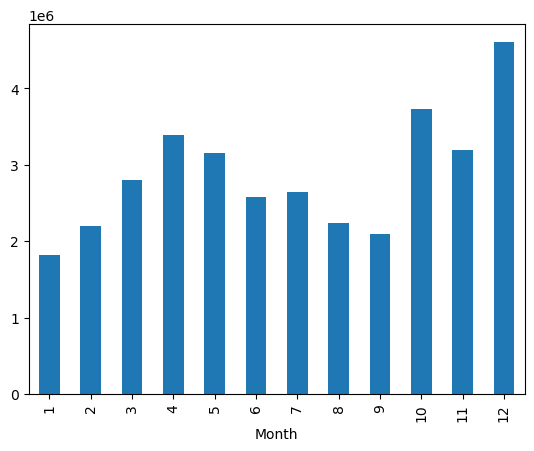

In [75]:
all_data.groupby(['Month'])['sales'].sum().plot(kind='bar')

In [ ]:
'''
Observations: 
->> y-axis scale : 1e^6

E stands for exponential , in short it is *10^

So, 1e6 or 1e^6 OR 1 exponent 6 is the same as 1*10^6 which is same as 1,000,000


Inference : December is the best month of sales ..

'''

In [ ]:
#3.. Which city has max order ?
...

In [77]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


In [79]:
all_data['Purchase Address'][0]

'917 1st St, Dallas, TX 75001'

In [81]:
all_data['Purchase Address'][0].split(',')[1] ## extracting city from "Purchase Address"

' Dallas'

In [83]:
all_data['city'] = all_data['Purchase Address'].str.split(',').str.get(1)

In [85]:
all_data['city']

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: city, Length: 185686, dtype: object

In [87]:
pd.value_counts(all_data['city']) ## frequency table..

city
San Francisco    44662
Los Angeles      29564
New York City    24847
Boston           19901
Atlanta          14863
Dallas           14797
Seattle          14713
Portland         12449
Austin            9890
Name: count, dtype: int64

<Axes: ylabel='count'>

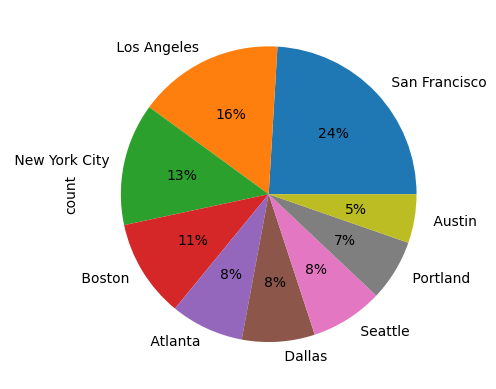

In [89]:
pd.value_counts(all_data['city']).plot(kind='pie' , autopct = '%1.0f%%') ## Pandas pie chart..